In [18]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO

In [19]:
path0 = r'C:\Users\sagar\Desktop\testing_yolo\DATASET\TEST\warrior2\00000001.jpg'

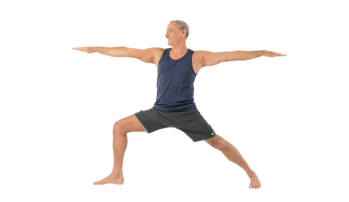

In [20]:
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [21]:
!yolo pose predict model=yolov8n-pose.pt source={path0} 

Ultralytics YOLOv8.0.235 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 C:\Users\sagar\Desktop\testing_yolo\DATASET\TEST\warrior2\00000001.jpg: 384x640 1 person, 284.9ms
Speed: 5.6ms preprocess, 284.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\pose\predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [22]:
path2 = r'C:\Users\sagar\Desktop\testing_yolo\runs\pose\predict3\00000001.jpg'

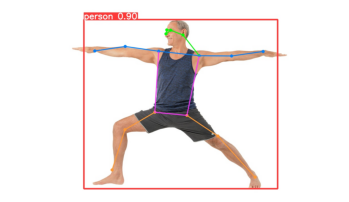

In [23]:
img=plt.imread(path2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# Predict with the model
results = model(path0)  


image 1/1 C:\Users\sagar\Desktop\testing_yolo\DATASET\TEST\warrior2\00000001.jpg: 384x640 1 person, 251.8ms
Speed: 5.1ms preprocess, 251.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference and postprocess speeds in milliseconds per image.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [25]:
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

,x,y,x2,y2,confidence,class,i
0,275.0,48.0,969.0,652.0,0.902361,0.0,0.0


In [26]:
results[0].boxes.data

tensor([[2.7500e+02, 4.8000e+01, 9.6900e+02, 6.5200e+02, 9.0236e-01, 0.0000e+00]])

In [27]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9850, 0.9794, 0.8268, 0.9379, 0.1387, 0.9985, 0.9751, 0.9982, 0.9367, 0.9914, 0.8754, 0.9994, 0.9976, 0.9941, 0.9794, 0.9224, 0.8447]])
data: tensor([[[5.6925e+02, 9.9455e+01, 9.8498e-01],
         [5.8629e+02, 8.6652e+01, 9.7941e-01],
         [5.7229e+02, 8.5799e+01, 8.2679e-01],
         [6.3006e+02, 1.0367e+02, 9.3790e-01],
         [0.0000e+00, 0.0000e+00, 1.3867e-01],
         [6.8826e+02, 1.7777e+02, 9.9853e-01],
         [5.4361e+02, 1.6159e+02, 9.7506e-01],
         [8.0425e+02, 1.7874e+02, 9.9823e-01],
         [4.2307e+02, 1.4421e+02, 9.3671e-01],
         [9.1747e+02, 1.6294e+02, 9.9142e-01],
         [3.1431e+02, 1.6058e+02, 8.7540e-01],
         [6.4489e+02, 3.9048e+02, 9.9940e-01],
         [5.2985e+02, 3.7969e+02, 9.9759e-01],
         [7.5587e+02, 4.6463e+02, 9.9411e-01],
         [4.2240e+02, 4.4115e+02, 9.7944e-01],
         [8.8836e+02, 6.1174e+02, 9.2244e-01],
         [3.7682e+02, 5.851

In [28]:
results[0].keypoints.conf

tensor([[0.9850, 0.9794, 0.8268, 0.9379, 0.1387, 0.9985, 0.9751, 0.9982, 0.9367, 0.9914, 0.8754, 0.9994, 0.9976, 0.9941, 0.9794, 0.9224, 0.8447]])

[[     569.25      99.455]
 [     586.29      86.652]
 [     572.29      85.799]
 [     630.06      103.67]
 [          0           0]
 [     688.26      177.77]
 [     543.61      161.59]
 [     804.25      178.74]
 [     423.07      144.21]
 [     917.47      162.94]
 [     314.31      160.58]
 [     644.89      390.48]
 [     529.85      379.69]
 [     755.87      464.63]
 [      422.4      441.15]
 [     888.36      611.74]
 [     376.82      585.19]]


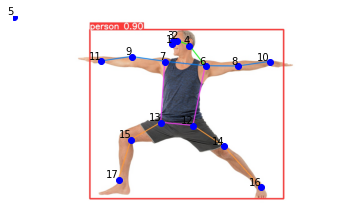

Angle between co-ordinates 1,2,3: 40.42 degrees
Angle between co-ordinates 2,3,4: 13.7 degrees
Angle between co-ordinates 3,4,5: 7.84 degrees
Angle between co-ordinates 4,5,6: 5.14 degrees
Angle between co-ordinates 5,6,7: 8.1 degrees
Angle between co-ordinates 6,7,8: 2.62 degrees
Angle between co-ordinates 7,8,9: 1.41 degrees
Angle between co-ordinates 8,9,10: 3.01 degrees
Angle between co-ordinates 9,10,11: 1.94 degrees
Angle between co-ordinates 10,11,12: 34.59 degrees
Angle between co-ordinates 11,12,13: 29.46 degrees
Angle between co-ordinates 12,13,14: 15.24 degrees
Angle between co-ordinates 13,14,15: 16.57 degrees
Angle between co-ordinates 14,15,16: 16.08 degrees
Angle between co-ordinates 15,16,17: 17.14 degrees


In [29]:
numpy_array = results[0].keypoints.data[0].numpy()
coordinates = numpy_array[:, 0:2]
print(coordinates)


"""The coordinates have been marked for representation for the goddess pose 
first image
[
    [405.2466,  60.0128],  # at the nose 
    [418.5668,  47.8398], # at the right eye
    [394.5231,  46.2677], # at the left eye
    [433.5818,  63.4811], # right ear
    [375.5804,  58.8397], # left ear
    [478.7749, 131.1518], # right shoulder
    [325.1884, 131.5727], # left shoulder 
    [525.2437, 215.4563], # right elbow
    [299.2421, 215.8858], # left elbow
    [438.4142, 207.9540], # right hand 
    [381.5312, 208.4352], # left hand
    [470.8839, 309.7605], # right thigh
    [350.0955, 311.3801], # left thigh
    [557.8467, 362.9910], # right knee
    [275.1894, 372.2162], # left knee
    [579.9728, 499.9867], # right foot
    [238.7405, 516.6460]  # left foot
  ] """

# Extract x and y coordinates
coordinates_x, coordinates_y = zip(*coordinates)

img=plt.imread(path2)
plt.imshow(img)
plt.axis('off')
plt.scatter(coordinates_x, coordinates_y, color='blue', marker='o')

# Add labels for each point
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, str(i+1), ha='right', va='bottom')

# Show the plot
plt.show()


def calculate_angle(coord1, coord2, coord3):
    vector1 = np.array(coord1) - np.array(coord2)
    vector2 = np.array(coord3) - np.array(coord2)

    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Calculate the angle in radians
    angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))

    # Convert angle from radians to degrees
    angle_deg = np.degrees(angle_rad)

    return angle_deg

# Example coordinates
coord1 = [325.1884, 131.5727]
coord2 = [299.2421, 215.8858]
coord3 = [381.5312, 208.4352]

# Calculate the angle between the coordinates
for i in range(len(coordinates) - 2):
    angle = calculate_angle(coordinates[i], coordinates[i+1], coordinates[i+2])
    print(f"Angle between co-ordinates {i+1},{i+2},{i+3}: {round(angle, 2)} degrees")

In [30]:
results[0].keypoints.orig_shape

(675, 1200)

tensor([[[569.2524,  99.4548],
         [586.2858,  86.6522],
         [572.2883,  85.7989],
         [630.0645, 103.6703],
         [  0.0000,   0.0000],
         [688.2645, 177.7734],
         [543.6086, 161.5853],
         [804.2546, 178.7421],
         [423.0719, 144.2117],
         [917.4651, 162.9366],
         [314.3053, 160.5788],
         [644.8891, 390.4780],
         [529.8491, 379.6914],
         [755.8694, 464.6346],
         [422.4029, 441.1502],
         [888.3603, 611.7393],
         [376.8151, 585.1885]]])
(1, 17, 2)


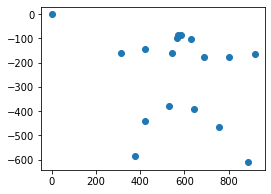

In [31]:
print(results[0].keypoints.xy)
boxes = np.array(results[0].keypoints.xy)
print(boxes.shape)
plt.figure(figsize=(4,3))
plt.scatter(boxes[0][:,0], -boxes[0][:,1], )
plt.show()

tensor([[[0.4744, 0.1473],
         [0.4886, 0.1284],
         [0.4769, 0.1271],
         [0.5251, 0.1536],
         [0.0000, 0.0000],
         [0.5736, 0.2634],
         [0.4530, 0.2394],
         [0.6702, 0.2648],
         [0.3526, 0.2136],
         [0.7646, 0.2414],
         [0.2619, 0.2379],
         [0.5374, 0.5785],
         [0.4415, 0.5625],
         [0.6299, 0.6883],
         [0.3520, 0.6536],
         [0.7403, 0.9063],
         [0.3140, 0.8669]]])
(1, 17, 2)


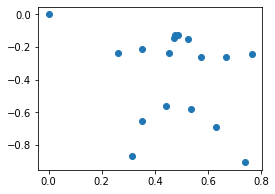

In [32]:
print(results[0].keypoints.xyn)
boxes = np.array(results[0].keypoints.xyn)
print(boxes.shape)
plt.figure(figsize=(4,3))
plt.scatter(boxes[0][:,0], -boxes[0][:,1], )
plt.show()

tensor([[2.7500e+02, 4.8000e+01, 9.6900e+02, 6.5200e+02, 9.0236e-01, 0.0000e+00]])


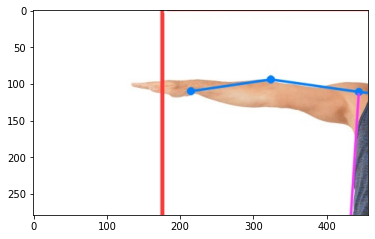

In [33]:
print(results[0].boxes.data)
img=plt.imread(path2)
plt.imshow(img[50:329,99:556])
plt.show()